# Data loading and bounding boxes
Load one image and draw all boxes from the matching label file.


0621f33daeb9ed28.jpg


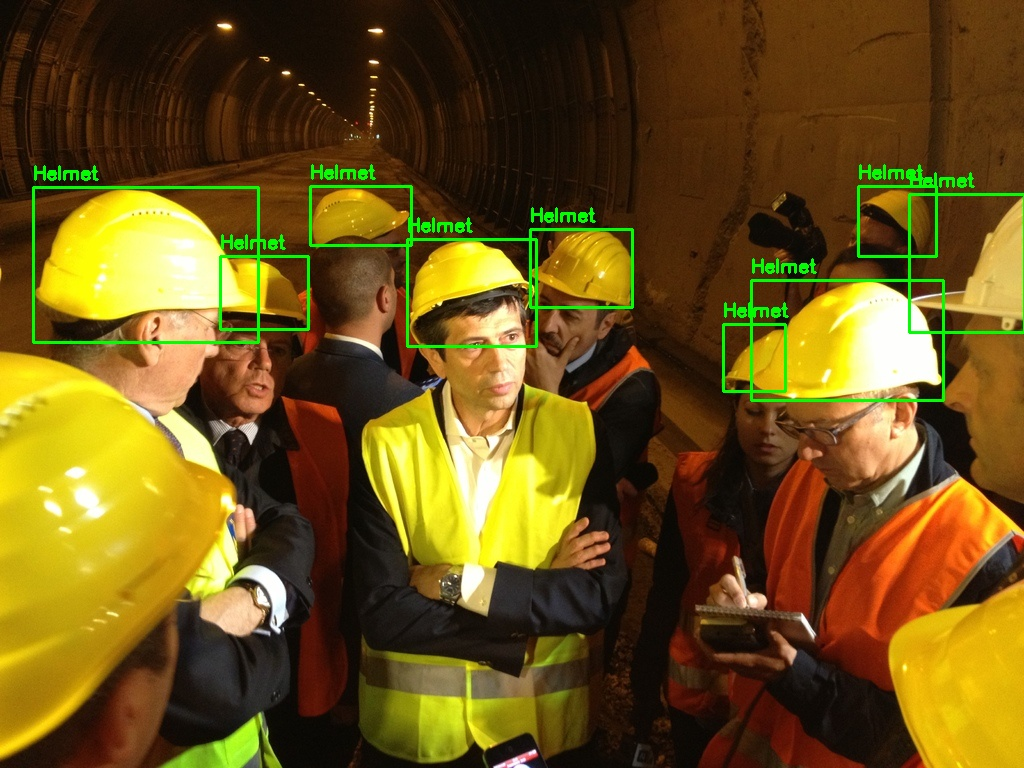

0ca56558107bdae5.jpg


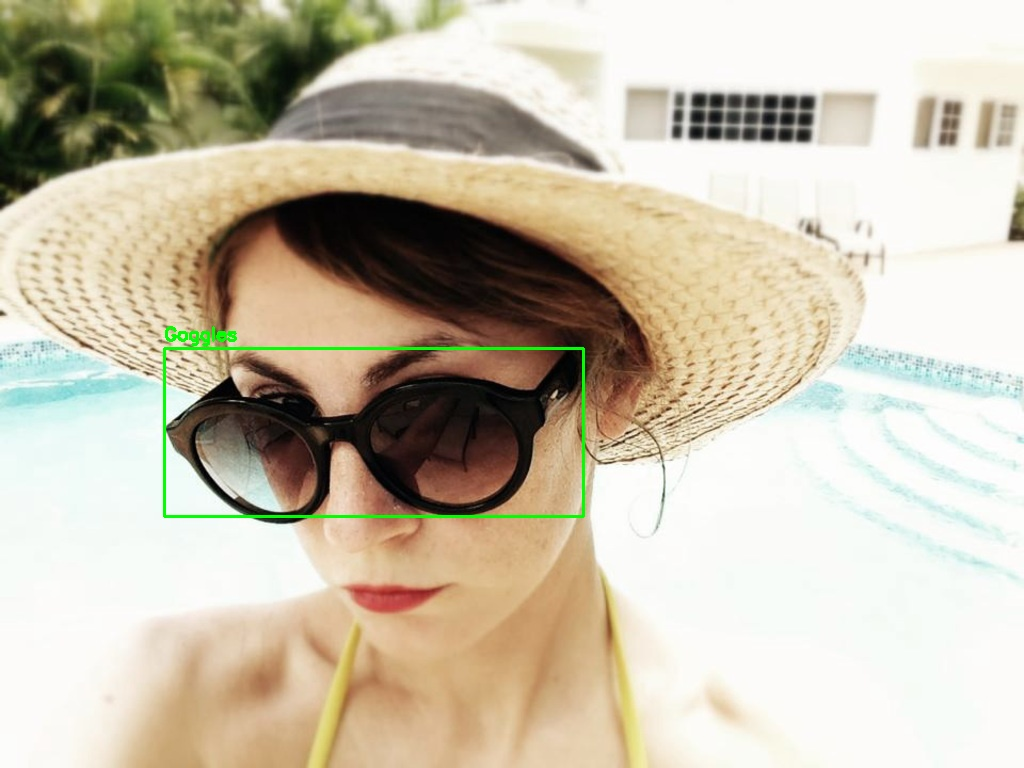

1519b2618048f525.jpg


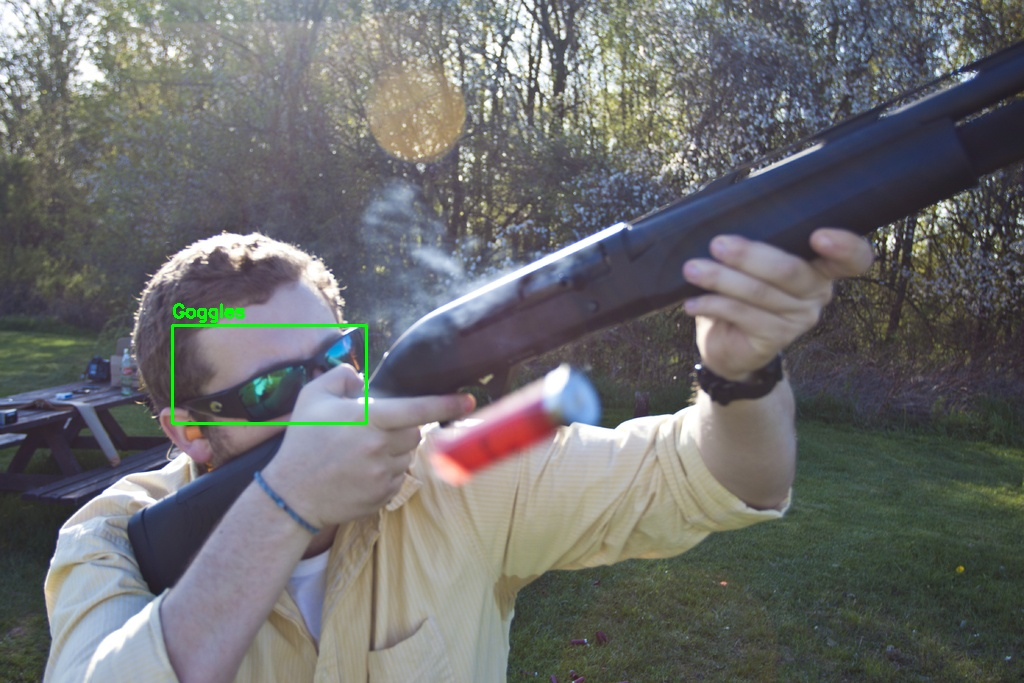

1b6dc7e27f160fc5.jpg


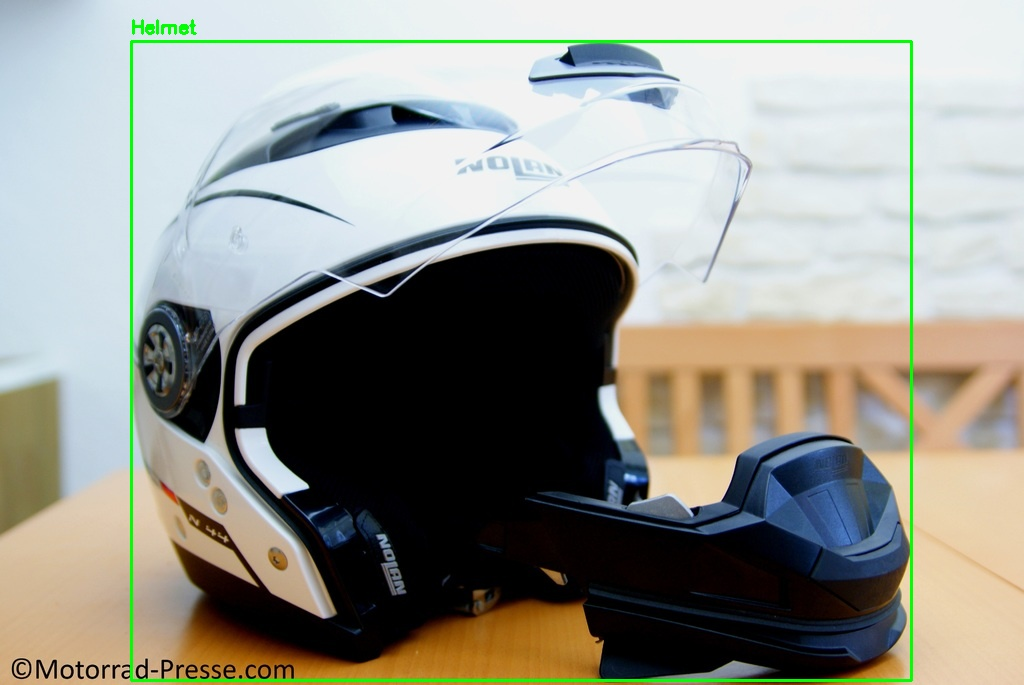

1bd0c9a68b41d02c.jpg


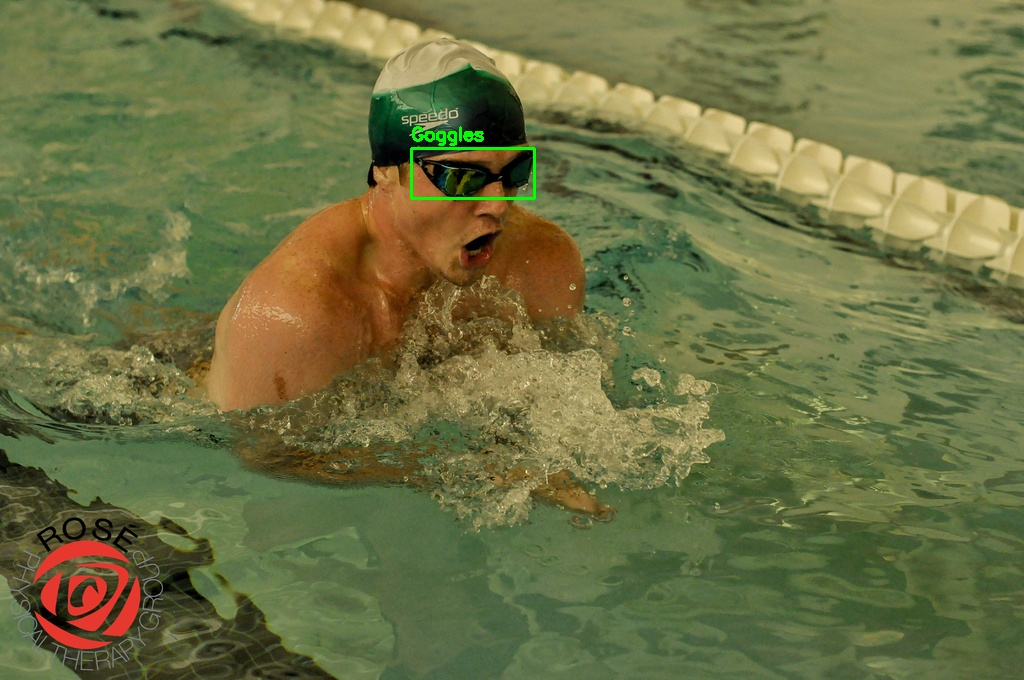

1f21eeca4577a562.jpg


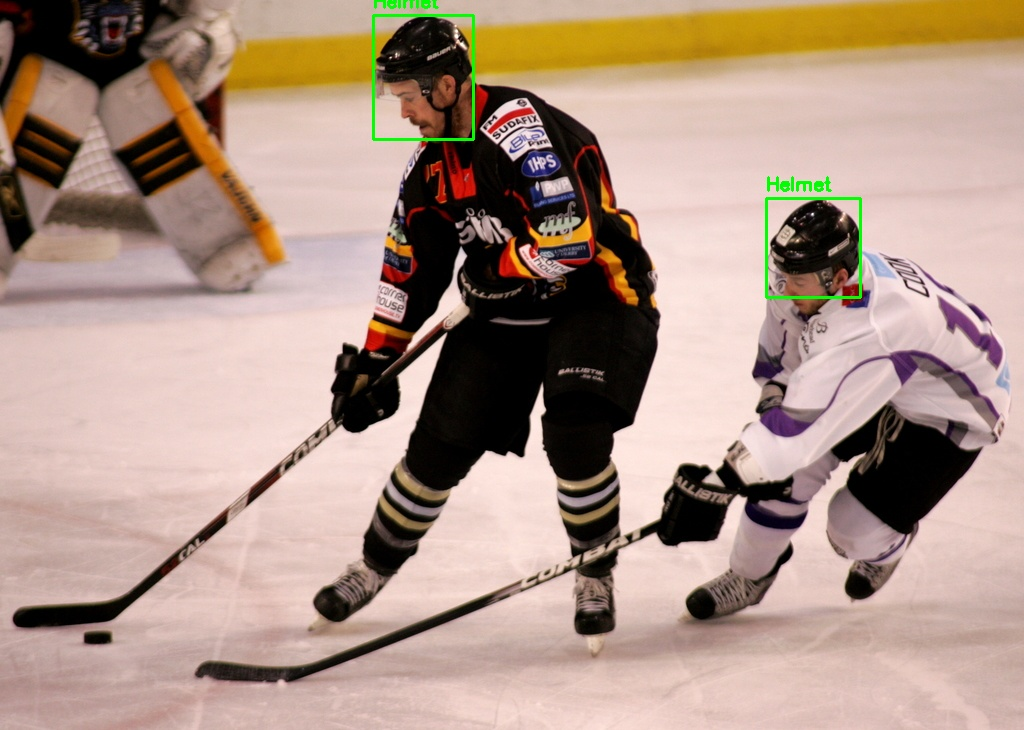

1ffbe05c03db333a.jpg


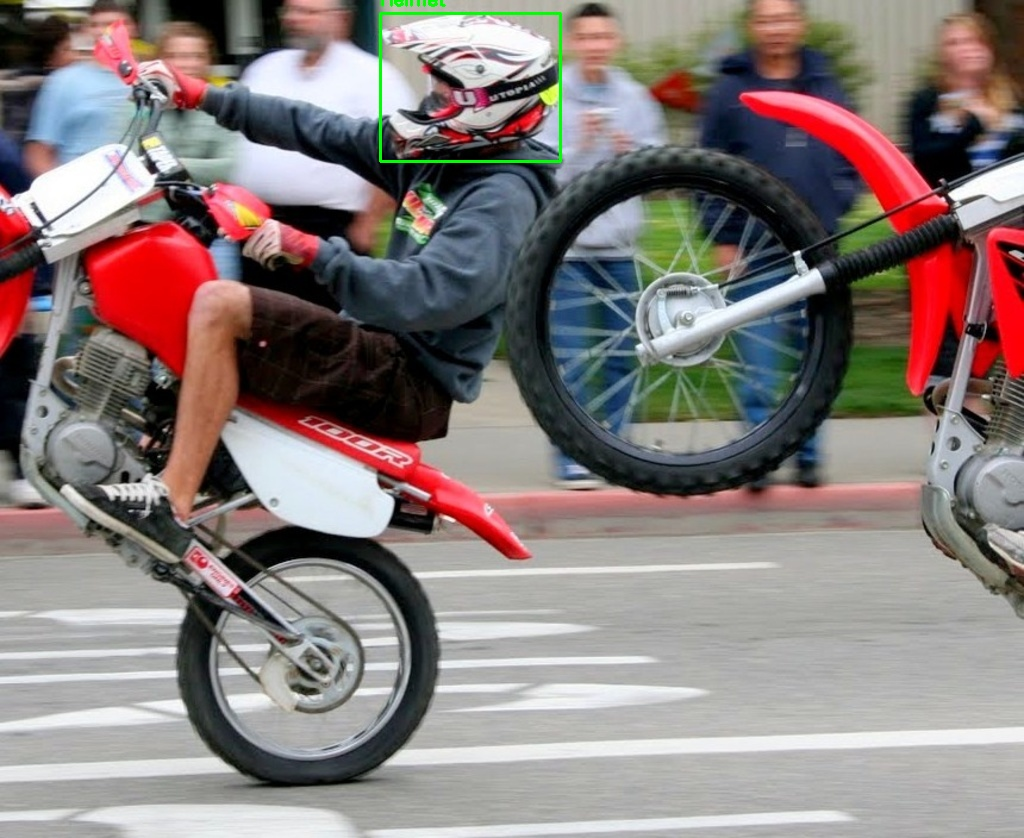

2b480bd3e713201b.jpg


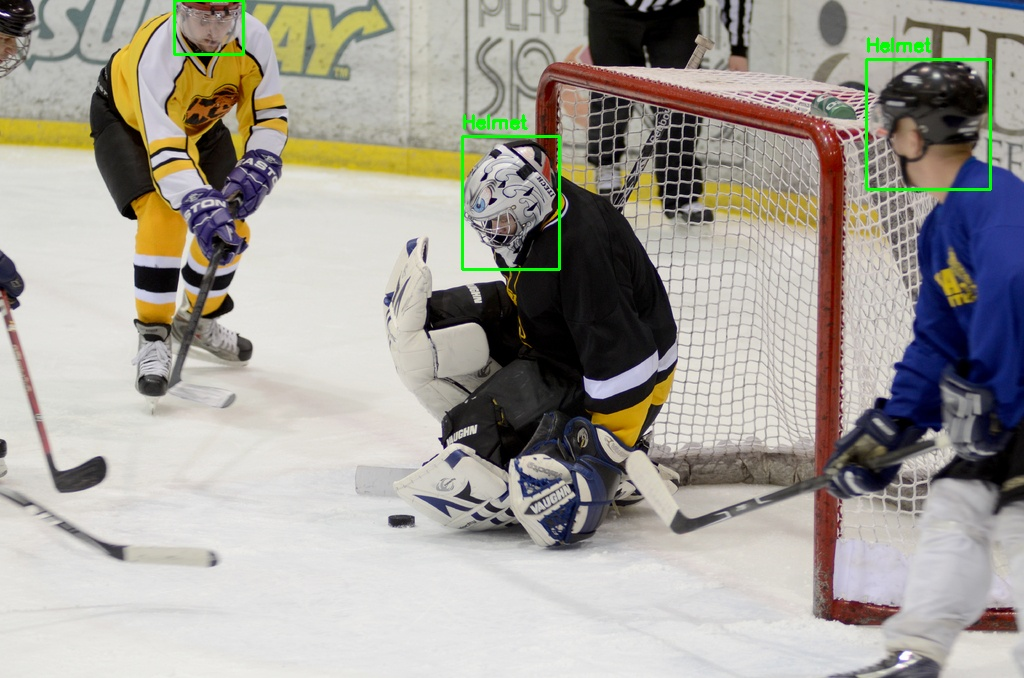

31c40da724ed3376.jpg


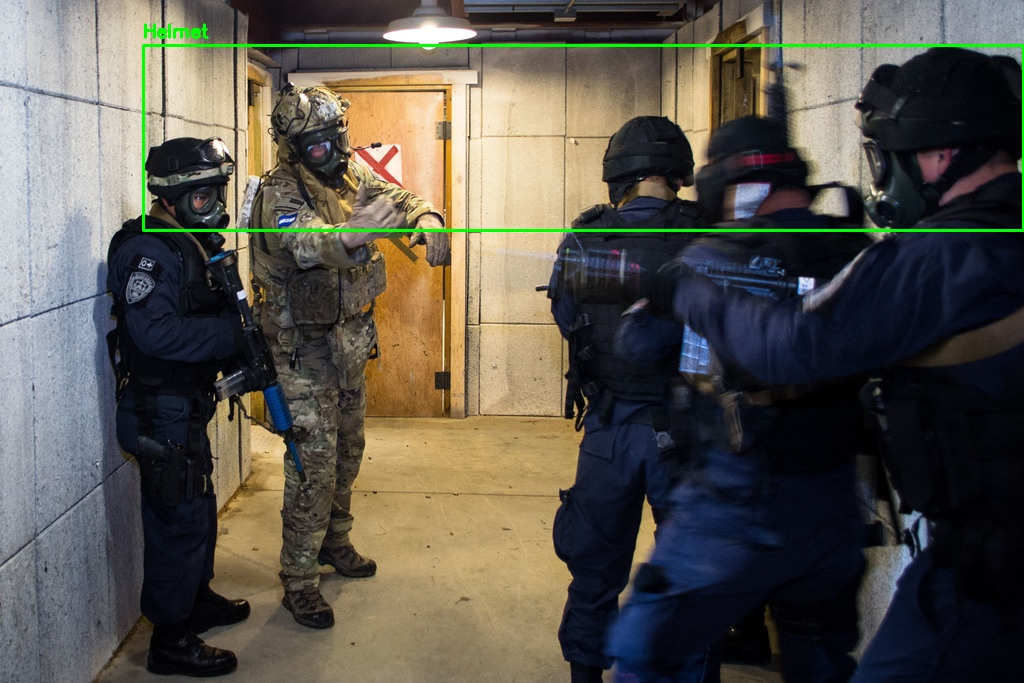

3332995b230f5680.jpg


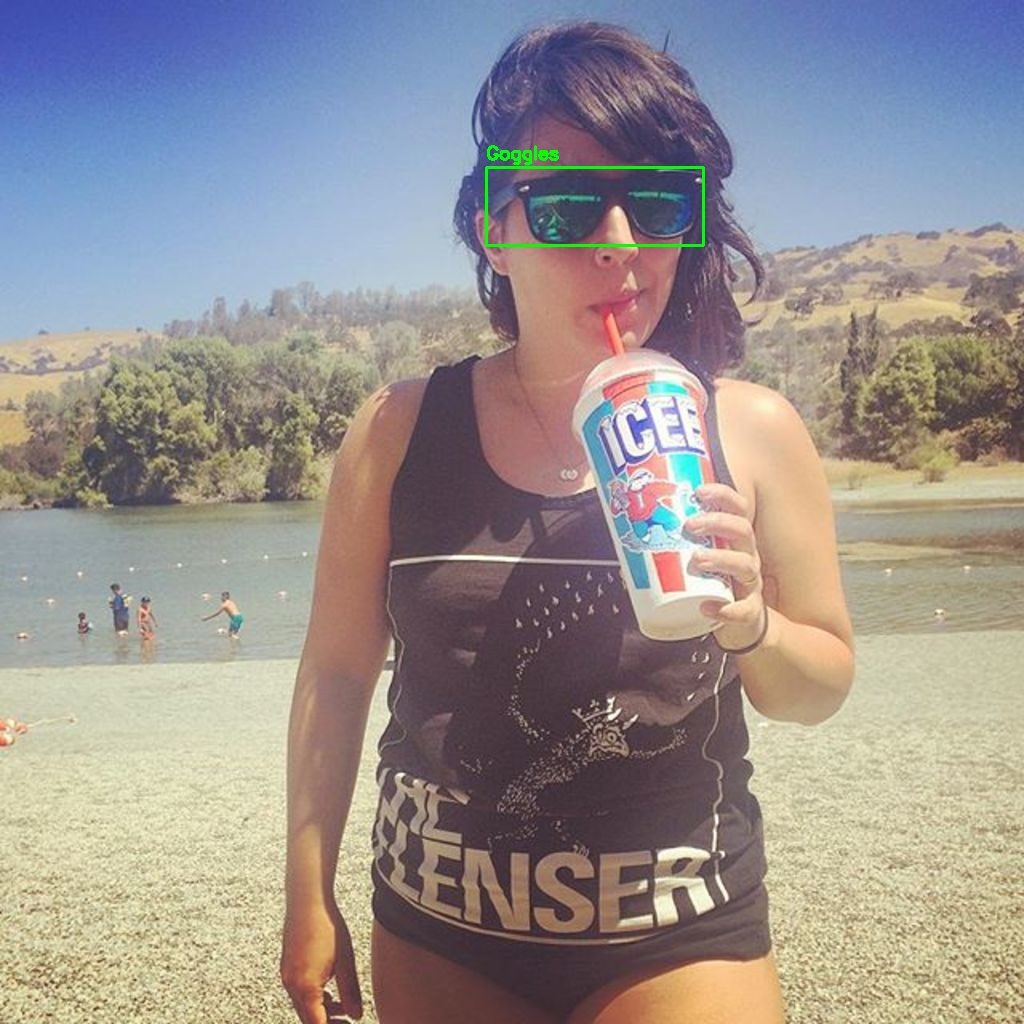

In [5]:
from pathlib import Path
import cv2
from IPython.display import display, Image as IPImage

# set this to 10 or 20
num_images = 10

base = Path(r"D:/internship/SaftyEye/resources-and-scripts/OIDv4_ToolKit/OID/Dataset/validation/Goggles_Helmet")
image_paths = sorted(base.glob("*.jpg"))[:num_images]

for img_path in image_paths:
    img = cv2.imread(str(img_path))
    label_path = base / "Label" / f"{img_path.stem}.txt"

    for line in label_path.read_text().strip().splitlines():
        cls_name, x1, y1, x2, y2 = line.split()
        x1, y1, x2, y2 = map(lambda v: int(float(v)), [x1, y1, x2, y2])

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, cls_name, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    _, enc = cv2.imencode(".jpg", img)
    print(img_path.name)
    display(IPImage(data=enc.tobytes()))
